# Auckland House Prices Analysis

In [1]:
import json
import sys
sys.path.append('/home/nbuser/library/')

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def get_pop_count(lat,lng):
    url = 'https://koordinates.com/services/query/v1/vector.json'
    
    params = {
        'key' : 'b182088e71d045e58c6c8176cf2aa1c5',
        'layer' : 104612,
        'x' : lng,
        'y' : lat,
    }
    
    response = requests.get(url,params=params)
    
    if response.status_code != 200:
        return pd.Series({'Population' : response.status_code})

    pop_count = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    return pd.Series({'Population' : pop_count})

# Adding population count to dataset

In [ ]:
df = pd.read_csv('Dataset for Assignment.csv')

In [ ]:
df['Population'] = df.apply(lambda row: get_pop_count(row['Latitude'], row['Longitude']), axis = 1)
df.head()

# Adding Deprivation Index

In [ ]:
df2 = pd.read_excel('otago730395.xlsx')
dataset = df.merge(df2, left_on='SA1', right_on='SA12018_code')

# Data Cleaning

In [ ]:
dataset['Land area'] = dataset['Land area'].str.extract('(\d+)').astype('float')
del dataset['SA12018_code']
del dataset['URPopnSA1_2018']
dataset = dataset.dropna()
dataset['Bathrooms'] = dataset['Bathrooms'].astype('int')
dataset = dataset.drop_duplicates()

In [ ]:
dataset.to_csv('Completed_dataset.csv',index=False)

In [ ]:
dataset.isnull().values.any()

# Data Analysis

In [2]:
dataset = pd.read_csv('Completed_dataset.csv')
dataset.dtypes

Bedrooms             int64
Bathrooms            int64
Address             object
Land area          float64
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
Population           int64
NZDep2018          float64
NZDep2018_Score    float64
SA22018_code         int64
SA22018_name        object
dtype: object

In [ ]:
dataset.describe()

In [ ]:
dataset.loc[dataset['Bedrooms'] == 17]

In [ ]:
dataset.loc[dataset['Land area'] == 22240]

In [ ]:
dataset.loc[dataset['Land area'] == 40]

In [ ]:
dataset.loc[dataset['CV'] == 270000]

In [ ]:
dataset.loc[dataset['CV'] == 18000000]

In [ ]:
dataset.loc[dataset['NZDep2018'] == 10.0]

In [ ]:
dataset.loc[dataset['NZDep2018'] == 1.0]

Average bedrooms in a house is 4 and average bathrooms is 2.

Average land area is 850m^2.

Average house price is $1,381,557.

Average population size 180 people.

There is a house with 17 bedrooms (outlier) in the Sandringham suburb that also has 8 bathrooms (outlier). This house has a lower than average CV of $760000 (less than the first quartile) and a land area of 1596m^2 (greater than the third quartile). The area has a population of 111 (less than the first quartile) and a deprivation index of 6.

There is a house that has a land area of 22240m^2 (outlier) in the Helensville suburb which has less than average CV. The area has a population of 165 (which is within the interquartile range) and a deprivation index of 3.

There is a house that has a land area of 40m^2 (outlier) in the Rakino Island suburb which has well above the average CV (greater than the third quartile). The area has a small population of 27 and a deprivation index of 6.

The cheapest house is found in Rakino Island with a CV of $270,000. It also has a sizeable land area of 1366m^2 (greater than the third quartile). The area has a small population of 27 and a deprivation index of 6.

The most expensive house is found in Epsom with a CV of $18,000,000. It also has quite a small land area of 123m^2 (less than the first quartile). The area has a small population of 60 and a depreviation index of 4.

Quite a few houses in areas that have a deprivation index of 1 has quite a high CV. The reverse is also true as areas with a deprivation index of 10 tend to have a lower than average CV.

In [ ]:
dataset.hist(figsize=(15,15))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


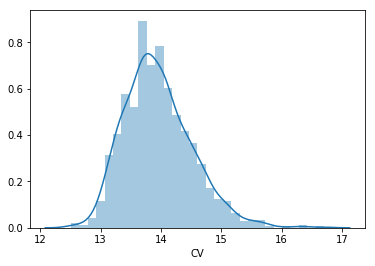

In [3]:
dataset['CV'] = np.log(dataset['CV'])
sns.distplot(dataset['CV'])

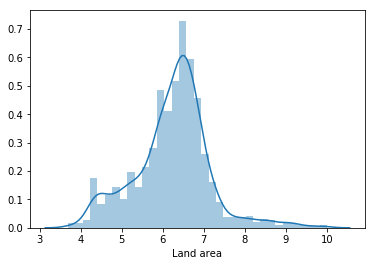

In [4]:
dataset['Land area'] = np.log(dataset['Land area'])
sns.distplot(dataset['Land area'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


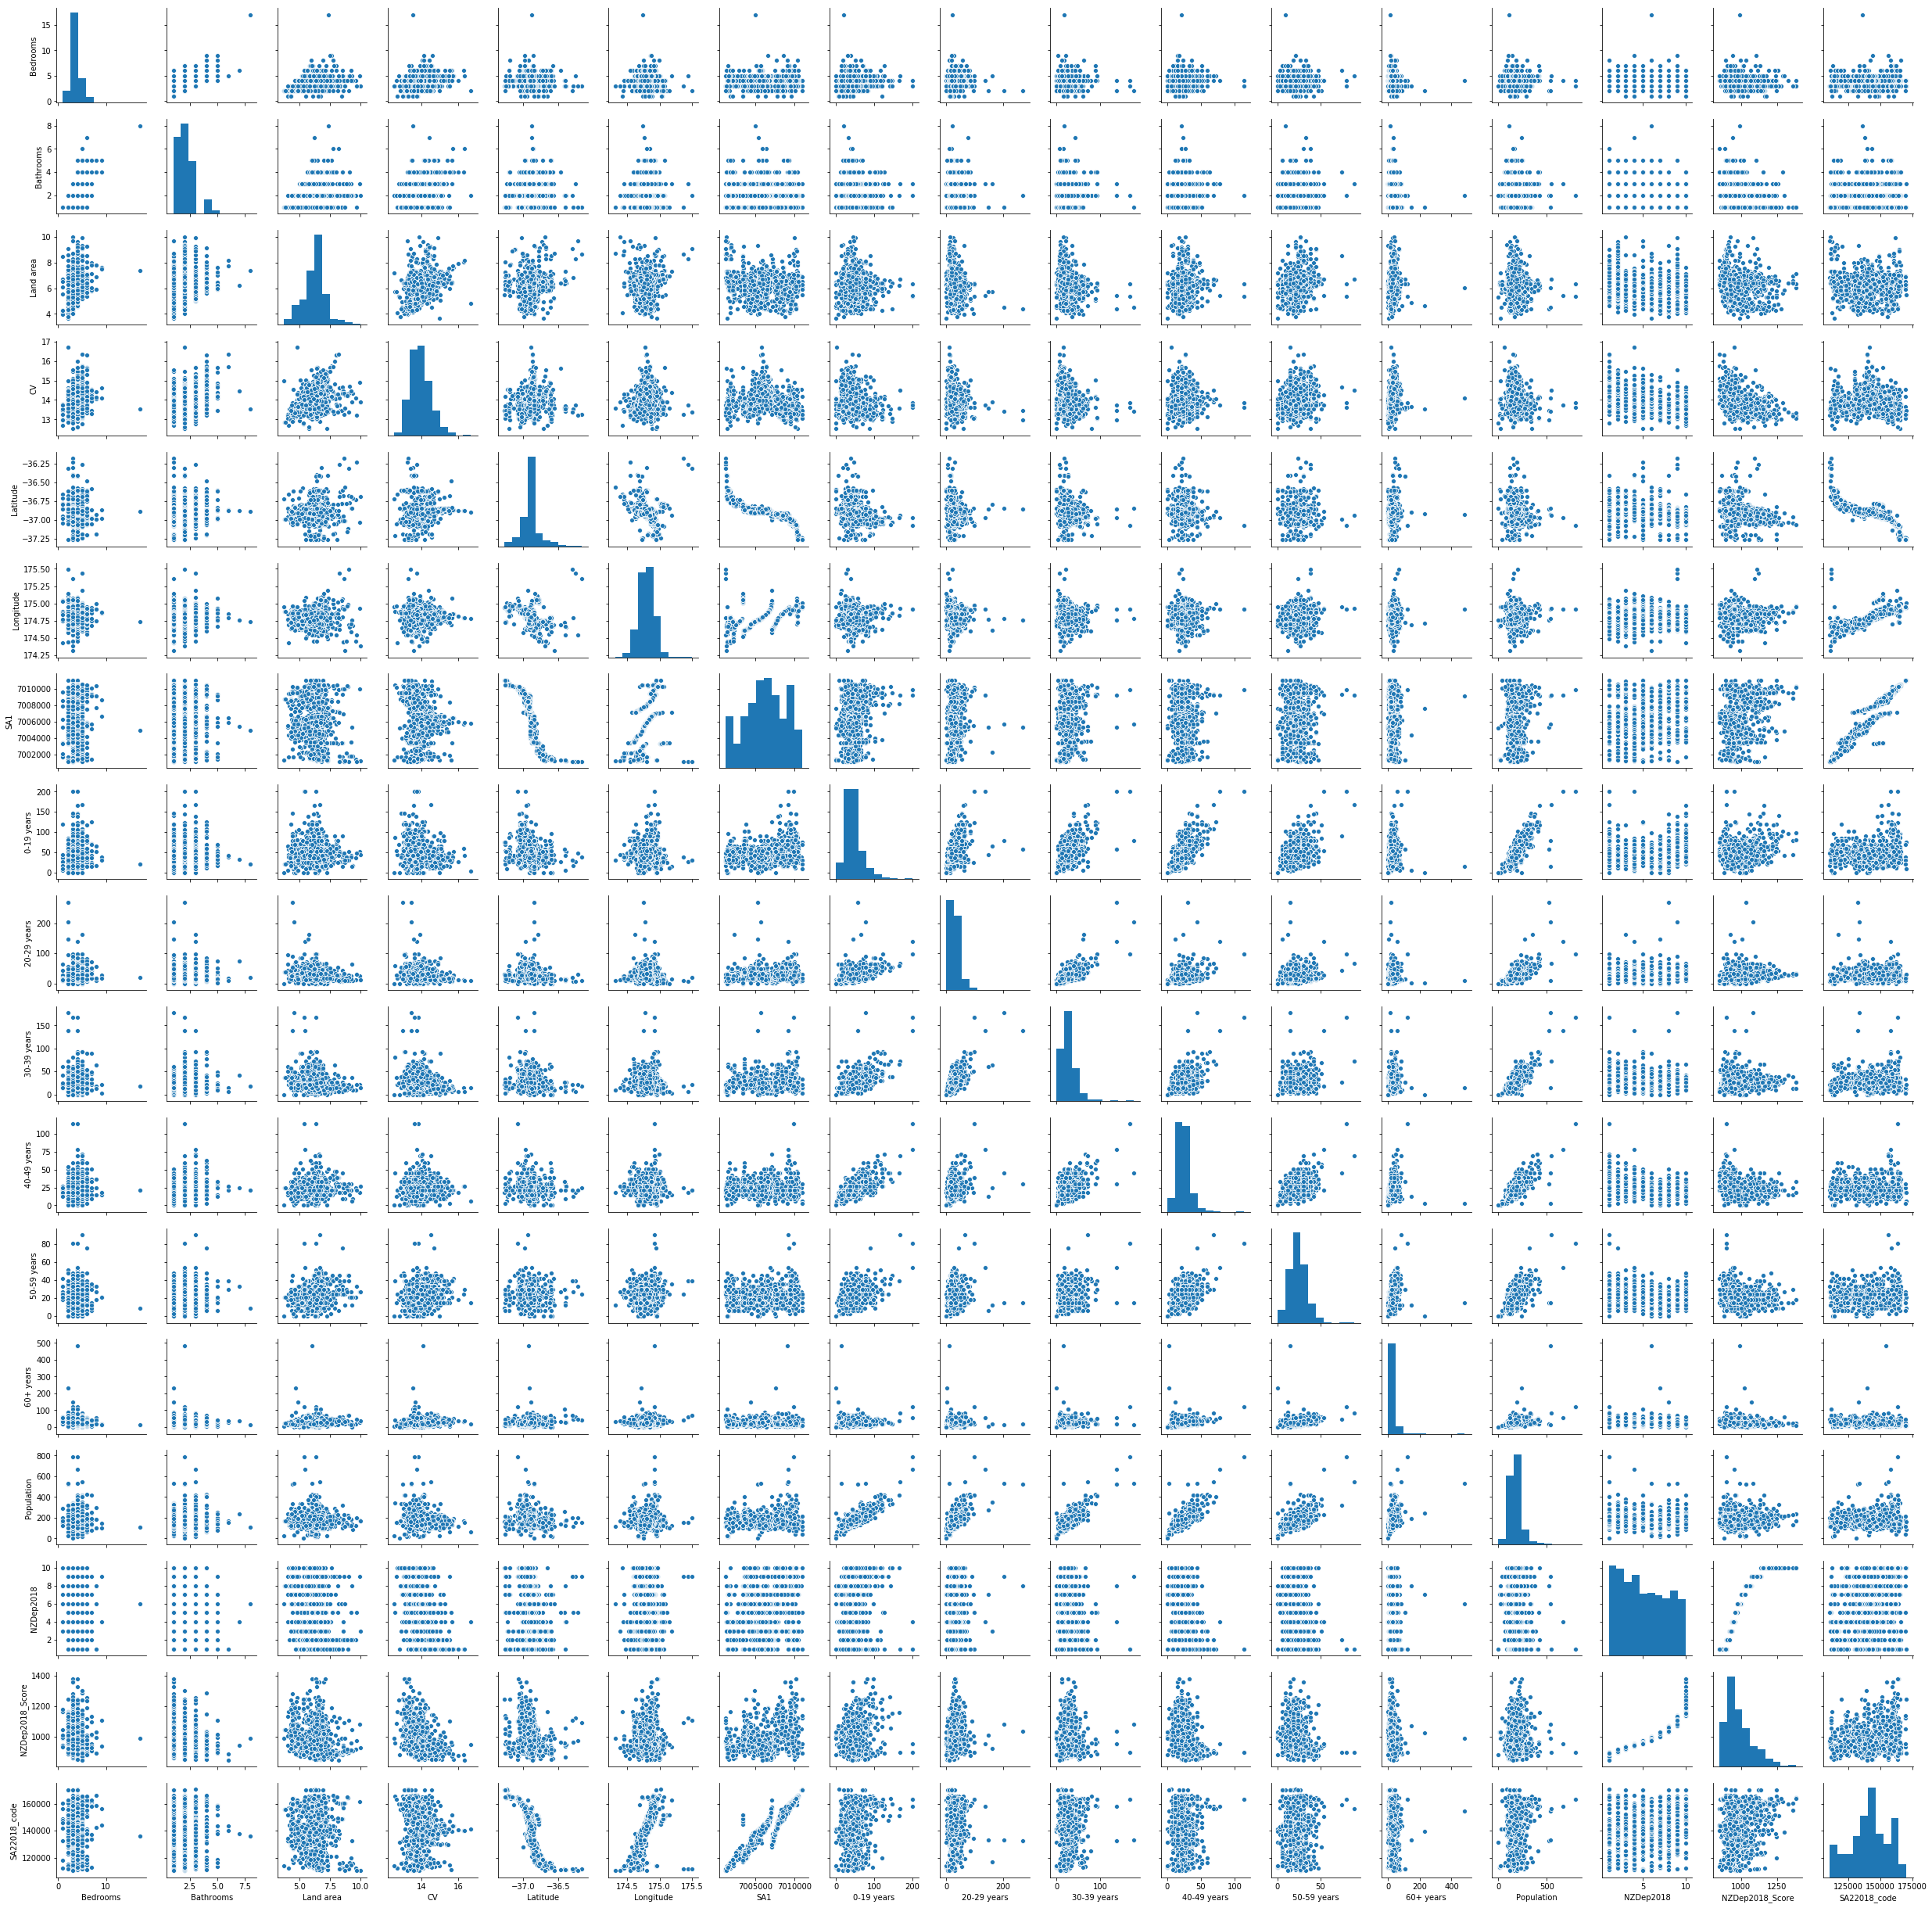

In [5]:
sns.pairplot(dataset,size=2.0)

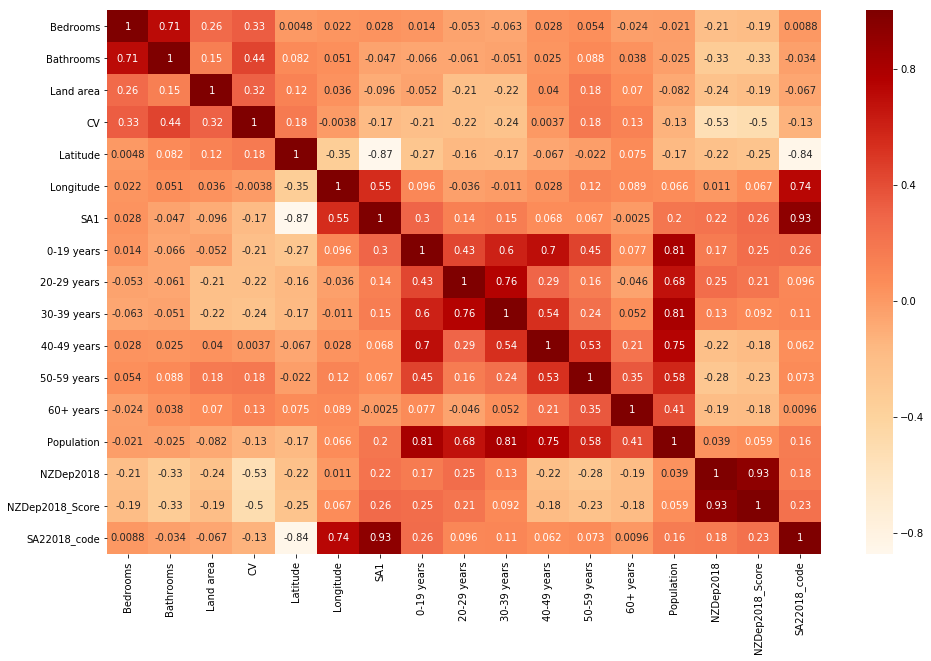

In [6]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
x = dataset[['Bathrooms','Land area','CV']]
y = dataset['Bedrooms']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=42)

x.head()

,Bathrooms,Land area,CV
0,3,6.570883,13.774689
1,3,6.335054,14.038654
2,4,6.439350,14.038654
3,1,4.174387,13.514405
4,1,6.398595,13.353475


In [ ]:
y.head()

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

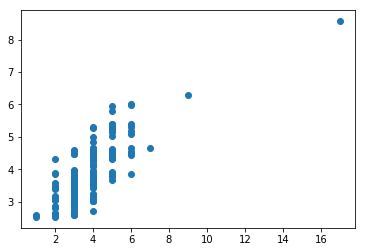

In [48]:
model.fit(train_x,train_y)
predicted = model.predict(test_x)
plt.scatter(test_y,predicted)

In [49]:
model.score(test_x,test_y) 

0.5922642106677092